# Assignment 6: Monte Carlo Estimate for Pi
## Sunny Pinkham
### Instructions:
#### Please complete the tasks below and answer the questions using well-written sentences. The quality of your writing matters. 

Suppose you randomly throw darts (_many_ darts!) at the unit square above. How can you use this idea to calculate $\pi$? This is called a Monte Carlo method.(see https://en.wikipedia.org/wiki/Monte_Carlo_method) <br>
 <br>
(1) Write a function called __monteCarloPi(n)__ that throws __n__ darts at the unit square and returns an estimate of $\pi$. <br>
(2) Make an example plot showing a single example of 100 throws at the unit square. Color the points appropriately to visually guide the user (also use two differnt symbol shapes). <br>
(3) Plot this estimate of $\pi$ as a function of __n__ in the range $[100,1,000,000]$ with the horizontal axis plotted logarithmically. <br>
(4) Write code to throw 1,000 darts at the unit square. Perform this action 10,000 times, and store each result in an array. Plot a histogram of the values of $\pi$ obtained. What is the mean value? What is the width of the histogram? In the context of this assignment, what is the significance of the histogram's width? Google is your friend! <br>
 <br>
A paper printout of your gorgeous and well-commented jupyter notebook is due at the beginning of class on Thursday. <br>
Also, please post your notebook to your Github account. Include at the beginning of your notebook the web address your public github repository. 

#### Import necessary packages:

In [3]:
# import statements for rest of notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['figure.figsize'] = 10, 10
import math as m   # importing math library outside function definition saves time 
import numpy as np
import matplotlib.patches as patches

### Part 1:  Write a function to estimate Pi:

If we plot random values in a unit square containing a quarter  of a unit circle, the ratio of the number of points in the circle to the number of points in the square will allow us to estimate $\pi$.  $$\frac{A_{circle}}{A_{square}}=\frac{\frac{\pi R^2}{4}}{R^2} = \frac{\pi}{4}$$
Thus: $$4*\frac{A_{circle}}{A_{square}}\approx \pi.$$  We can then right a function to calculate the ratio of points inside the circle to points in the square that gives us an estimate for $\pi.$

In [4]:
def monteCarloPi(n):
    rand = np.random.rand(2, n)
    xrand = rand[0]
    yrand = rand[1]
    
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for i in range(len(xrand)):
        if ((xrand[i]**2 +yrand[i]**2)**0.5)<=1:  # Because we are working with the unit circle, all points with a
            x_inside.append(xrand[i])             # distance <= 1 lie within or on the circle
            y_inside.append(yrand[i])
        else:
            x_outside.append(xrand[i])
            y_outside.append(yrand[i])
    pi = 4*len(x_inside)/len(xrand) #ratio of points in the quarter circle to all points plotted
    return x_inside, y_inside, x_outside, y_outside, pi

### Part 2:  Estimate Pi using n = 100.

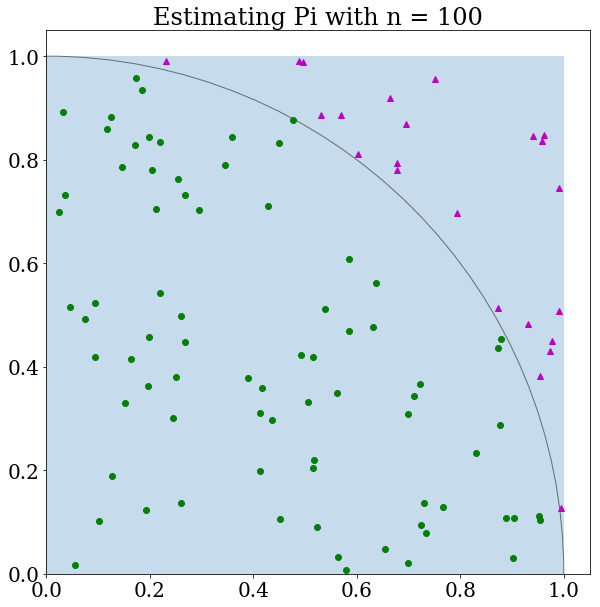

The estimate of Pi for n = 100 is 3.08 .


In [5]:
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        1,          # width
        1,          # height
        alpha=0.25  # transparency
    )
)
ax1.add_patch(
    patches.Arc(
        (0, 0),   # (x,y)
        2,          # width
        2,          # height
        theta1=0.0,
        theta2=90.0,
        alpha=0.5,  # transparency
    )
)

xin_100, yin_100, xout_100, yout_100, pi_100 = monteCarloPi(100)
plt.plot(xin_100, yin_100, 'go')
plt.plot(xout_100, yout_100, 'm^')



ax1.axis([0, 1.05, 0, 1.05])

#fig1.savefig('rect1.png', dpi=90, bbox_inches='tight')
plt.title('Estimating Pi with n = 100')
plt.show()


print("The estimate of Pi for n = 100 is", pi_100,'.')


#### Warning, the next cell takes a long time to run as is.  I would suggest changing 1,000,001 to 10,001 and get a less accurate estimate.

### Part 3:  Plot our estimate for Pi as a function of n

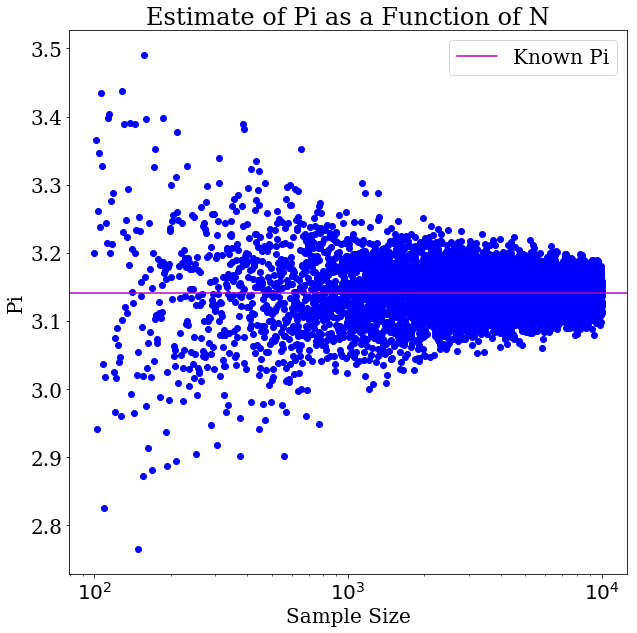

The estimate for pi is 3.14177402672 .


In [6]:
pi_n = []  

for i in np.arange(100, 10001,1):
    xin, yin, xout, yout, pi = monteCarloPi(i)
    pi_n.append(pi)

plt.plot(np.arange(100, 10001,1), pi_n,'bo')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Pi')
plt.axhline(np.pi, color = 'm',label = 'Known Pi')
plt.legend()
plt.title('Estimate of Pi as a Function of N')
plt.show()

print('The estimate for pi is', np.mean(pi_n),'.' )

Note, this is a plot for n = 100 to n = 10,001. (n = 1,000,001 takes signifciantly longer.)

I have plotted the known value for pi on the figure. As can be seen, as n increases, the estimate for pi converges to the known value of pi with some standard deviation.

# Part 4:  Estimate pi 10,000 times for n = 1000

In [7]:
pi_1000 = []
for i in range(10000):
    xin_1000, yin_1000, xout_1000, yout_1000, pi1000 = monteCarloPi(1000)
    pi_1000.append(pi1000)

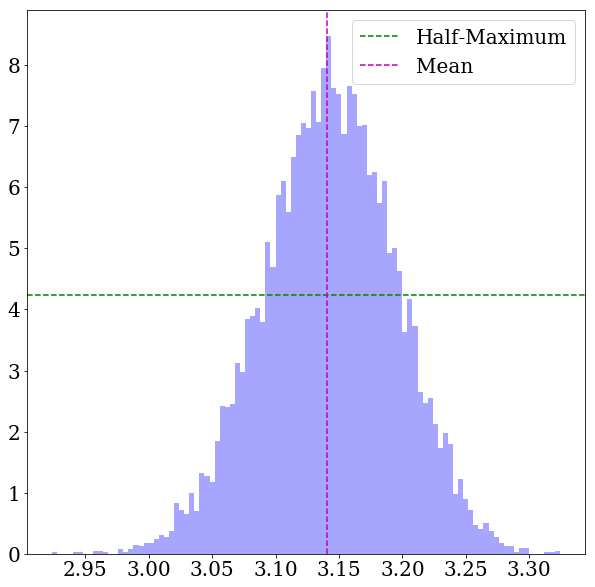

In [8]:
n, bins, patches = plt.hist(pi_1000, 100, normed=1, facecolor='b', alpha=0.35)
plt.axhline(n.max()/2, color = 'g', linestyle = 'dashed', label = 'Half-Maximum')
plt.axvline(np.mean(pi_1000), color = 'm', linestyle = 'dashed', label = 'Mean')
plt.legend()
plt.show()

In [9]:
print('The full width at Half-Maximum appear to be approximately 3.21 - 3.09 = 0.11.')
print (np.mean(pi_1000), np.mean(bins))
print(np.std(pi_1000), np.std(bins))

The full width at Half-Maximum appear to be approximately 3.21 - 3.09 = 0.11.
3.140828 3.124
0.0516187796834 0.116619037897


The mean value of pi for our n = 1000 computed 10,000 times is: $$\pi \approx 3.1408. $$ The full width of the histogram at half-maximum is approximately: $$ 3.21 - 3.09 = 0.11.$$  This histogram looks like a normal distribution.  Thus the full width at half-maximum represents an estimate of the standard deviation of our $\pi$ array.  The standard deviation is calculated by numpy to be: $$\sigma \approx 0.0523.$$ The histogram approximation of $\sigma$ is $\approx 2x$ greater than our $\sigma$ calculated from the $\pi$ array.  (However, these estimations for $\sigma$ significantly change each time new random values are generated.